**Лабораторная работа №5
Сегментация изображений**

**Цель работы:** Освоение основных способов сегментации изображений на семантические области.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters.rank import entropy
from skimage.morphology import disk

**1. Бинаризация. Выбрать произвольное изображение. Выполнить бинаризацию изображения при помощи рассмотренных методов. В зависимости от изображения использовать бинаризацию по верхнему или нижнему порогу.**

In [2]:
I = cv2.imread("headphones.jpg")
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

# бинаризация по двойному порогу
ret,thDouble = cv2.threshold(I, 127, 255,cv2.THRESH_BINARY)

# бинаризация по методу Отсу
ret2,thOtsu = cv2.threshold(I,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# бинаризация адаптивным методом
thAdapt = cv2.adaptiveThreshold(I,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)

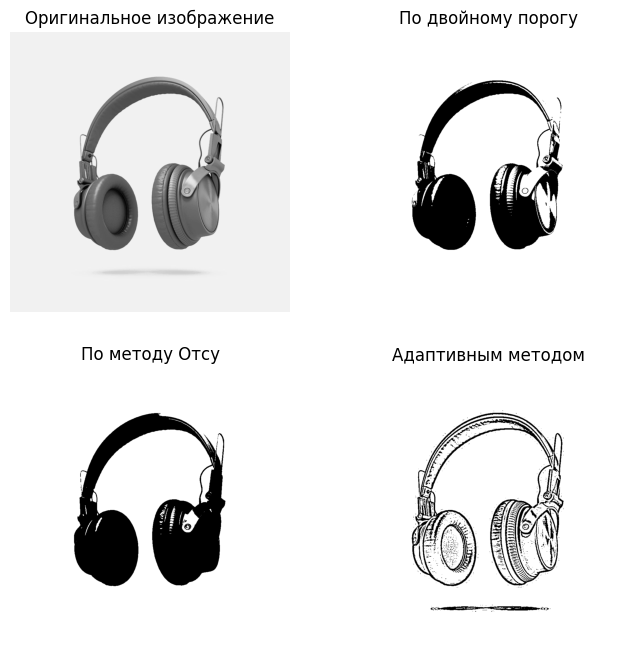

In [3]:
plt.figure(figsize=(8,8))

plt.subplot(2, 2, 1)
plt.title('Оригинальное изображение')
plt.axis('off')
plt.imshow(I,  cmap='gray')

plt.subplot(2, 2, 2)
plt.title('По двойному порогу')
plt.axis('off')
plt.imshow(thDouble,  cmap='gray')

plt.subplot(2, 2, 3)
plt.title('По методу Отсу')
plt.axis('off')
plt.imshow(thOtsu,  cmap='gray')

plt.subplot(2, 2, 4)
plt.title('Адаптивным методом')
plt.axis('off')
plt.imshow(thAdapt,  cmap='gray')

**2. Сегментация 1. Выбрать произвольное изображение, содержащее лицо(-а). Выполнить сегментацию изображения либо по принципу Вебера, либо на основе цвета кожи (на выбор).**

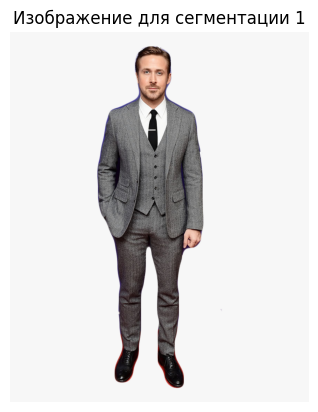

In [4]:
I = cv2.imread("gosling.jpg")
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.imshow(I)
plt.title('Изображение для сегментации 1')
plt.axis('off')
plt.show()

In [5]:
# сегментация изображения на основе цвета кожи
I_copy = I.copy()

for i in range(I.shape[0]):
    for j in range(I.shape[1]):
        red, green, blue = I[i][j][0], I[i][j][1], I[i][j][2]
        rgbSUM = red + green + blue
        r, g, b = red/rgbSUM, green/rgbSUM, blue/rgbSUM
        if r/g > 1.185 and r*b/(rgbSUM*rgbSUM) > 0.107 and r*g/(rgbSUM*rgbSUM) > 0.112:
            # print("пиксель ", i, j, " - кожа")
            I_copy[i][j][0] = 0
            I_copy[i][j][1] = 0
            I_copy[i][j][2] = 255
        #if I[i][j][0] > 95 and I[i][j][1] > 40 and I[i][j][2] < 50:
        #    print("пиксель ", i, j, " - кожа")

C:\Users\Asus\AppData\Local\Temp\ipykernel_15700\1760982526.py:7: RuntimeWarning: overflow encountered in scalar add
  rgbSUM = red + green + blue
C:\Users\Asus\AppData\Local\Temp\ipykernel_15700\1760982526.py:9: RuntimeWarning: overflow encountered in scalar multiply
  if r/g > 1.185 and r*b/(rgbSUM*rgbSUM) > 0.107 and r*g/(rgbSUM*rgbSUM) > 0.112:
C:\Users\Asus\AppData\Local\Temp\ipykernel_15700\1760982526.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  if r/g > 1.185 and r*b/(rgbSUM*rgbSUM) > 0.107 and r*g/(rgbSUM*rgbSUM) > 0.112:
C:\Users\Asus\AppData\Local\Temp\ipykernel_15700\1760982526.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  r, g, b = red/rgbSUM, green/rgbSUM, blue/rgbSUM
C:\Users\Asus\AppData\Local\Temp\ipykernel_15700\1760982526.py:9: RuntimeWarning: invalid value encountered in scalar divide
  if r/g > 1.185 and r*b/(rgbSUM*rgbSUM) > 0.107 and r*g/(rgbSUM*rgbSUM) > 0.112:
C:\Users\Asus\AppData\Local\Temp\ipykernel_15700\176098252

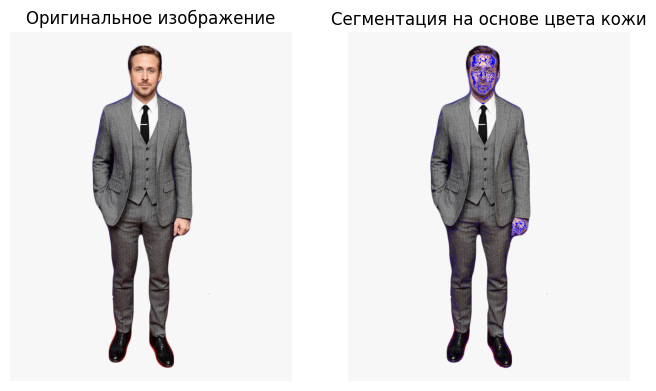

In [6]:
plt.figure(figsize=(8,8))

plt.subplot(1, 2, 1)
plt.title('Оригинальное изображение')
plt.axis('off')
plt.imshow(I,  cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Сегментация на основе цвета кожи')
plt.axis('off')
plt.imshow(I_copy,  cmap='gray')

**3. Сегментация 2. Выбрать произвольное изображение, содержащее ограниченное количество цветных объектов. Выполнить сегментацию изображения в пространстве CIE Lab либо по методу ближайших соседей, либо по методу 𝑘-средних
(на выбор).**

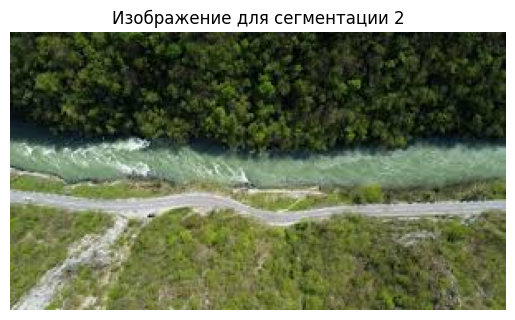

In [7]:
I = cv2.imread("river.jpg")
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.imshow(I)
plt.title('Изображение для сегментации 2')
plt.axis('off')
plt.show()

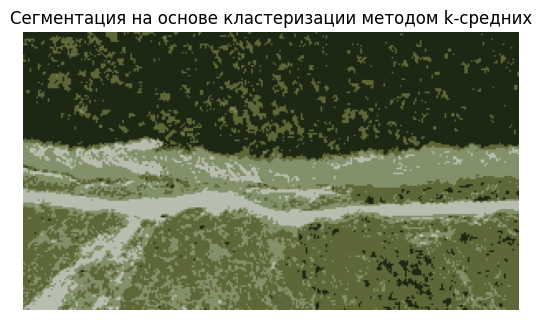

In [8]:
# Сегментация на основе кластеризации методом 𝑘-средних

Z = I.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((I.shape))

plt.imshow(res2)
plt.title('Сегментация на основе кластеризации методом k-средних')
plt.axis('off')
plt.show()

**4. Сегментация 3. Выбрать произвольное изображение, содержащее две разнородные текстуры. Выполнить текстурную сегментацию изображения, оценить не менее трех параметров выделенных текстур, определить к какому классу относятся текстуры.**

Будем рассматривать статистический подход, который описывает текстуру сегмента как гладкую, грубую или зернистую.

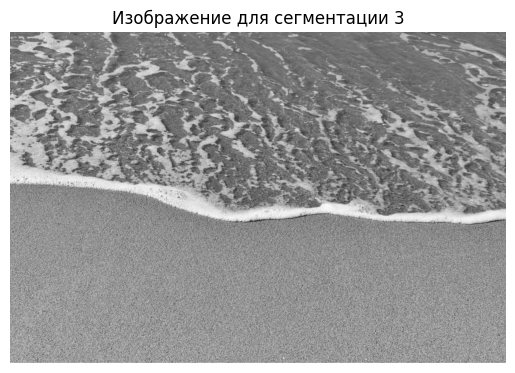

In [9]:
I = cv2.imread("sea.jpg")
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
plt.imshow(I, cmap="gray")
plt.title('Изображение для сегментации 3')
plt.axis('off')
plt.show()

In [10]:
image_entropy = entropy(I, disk(5))

ret2,image_Otsu = cv2.threshold(I,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(image_Otsu, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

I_contours = I.copy()
cv2.drawContours(I_contours, contours, -1, (0,255,0), 3)

array([[145, 148, 150, ..., 146, 144, 143],
       [150, 153, 154, ..., 145, 143, 142],
       [146, 148, 149, ..., 145, 144, 144],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

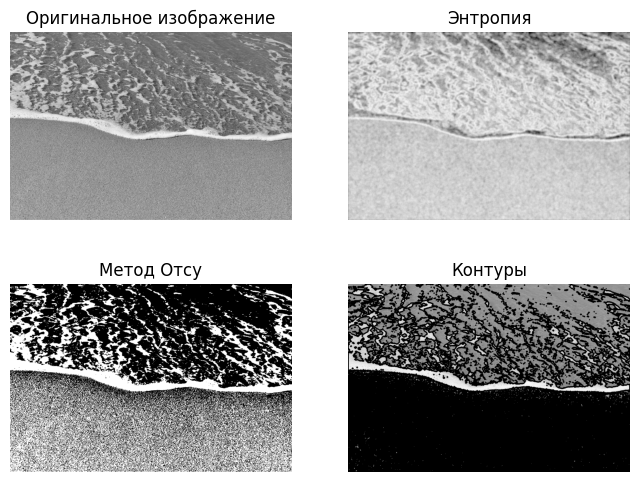

In [11]:
plt.figure(figsize=(8,6))

plt.subplot(2, 2, 1)
plt.title('Оригинальное изображение')
plt.axis('off')
plt.imshow(I,  cmap='gray')

plt.subplot(2, 2, 2)
plt.title('Энтропия')
plt.axis('off')
plt.imshow(image_entropy,  cmap='gray')

plt.subplot(2, 2, 3)
plt.title('Метод Отсу')
plt.axis('off')
plt.imshow(image_Otsu,  cmap='gray')

plt.subplot(2, 2, 4)
plt.title('Контуры')
plt.axis('off')
plt.imshow(I_contours,  cmap='gray')